In [269]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
import datetime as dt
import glob
import statistics as stat
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from scipy.optimize import curve_fit
from scipy.special import factorial
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [16,9]

## Releases Read in

In [3]:
release_header = ['id', 'target', 'date', 'date_offset', 'name', 'comment', 'author']
# Path to release.csv, and whether to select uncompressed or ocmpressed version
# release_path = 'D:/data/open_source/release.csv'
release_path = 'C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\release.csv'

In [4]:
def hex_str(str):
    return bytes.fromhex((str).replace('\\x','')).decode('utf-8')

def date_str(str):
    return pd.to_datetime(str, format='%Y-%m-%dT%H:%M:%S.000Z')

In [5]:
release_df = pd.read_csv(release_path, names=release_header, converters={'date':date_str,'comment':hex_str})

In [6]:
release_df = release_df[['id','date','name','comment','author']]

In [7]:
release_df.head()

,id,date,name,comment,author
0,\xae671a0067dbeabbc3cb546705edc1f81f71a193,2015-02-03 21:58:44,\x72656c656173652d323031352d30322d3034,"Release for February 4th, 2015\n",91949
1,\x33e2c27d1ec224a54ed7ca4a6e09c352e92a227d,2013-07-05 04:58:14,\x76302e32392e31,tag version 0.29.1\n,140982
2,\x1f9bcd823807f41afaab6b74b34473531ca7eb30,2013-03-29 13:02:20,\x76332e302e30,What's new in Tornado 3.0\n===================...,207066
3,\x3206fb28a040494bac6973310e7f21f031989da6,2010-12-09 04:14:19,\x6275696c642d343639,Windows build SickBeard-win32-alpha-build469\n,875380
4,\x652fc27cf9fe9262d2c941d6385043efa41016da,2011-11-08 01:22:48,\x312e312e36,Fabric 1.1.6\n,63770


## Revisions Read in

In [8]:
rev_df = pd.read_csv('C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\revision.csv', header=None)
rev_df.columns = ['id', 'date', 'date_offset', 'committer_date', 'committer_date_offset', 'type', 'directory', 'message', 'author', 'committer']
rev_df = rev_df[['id', 'date']]

rev_df['id'] = rev_df['id'].apply(lambda x: x[2:])
rev_df['date'] = rev_df['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z'))

rev_df.head()

,id,date
0,01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b,2015-04-02 01:11:50
1,01d76a45b817be788eab3e27a93e41c74a6d8957,2010-08-14 17:15:31
2,03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c,2013-09-27 17:02:55
3,05c9110ba2615d42af41a77138bc62dd18278320,2011-10-25 20:11:52
4,06de8d8e88d5b6311ea3feae369c85d157c9dfe3,2017-10-31 20:29:21


## Next Steps
### - Look into the amount of revisions on a certain day and see if there is a correlation between releases
### - See if there is a correlation between amount of revisions and releases seperated by a week etc...

In [9]:
revPerWeekCount = pd.DataFrame()
revPerWeekCount['count'] = rev_df['date'].value_counts().resample('w').apply('count')
revPerWeekCount.head()

,count
1980-01-20,2
1980-01-27,0
1980-02-03,0
1980-02-10,0
1980-02-17,0


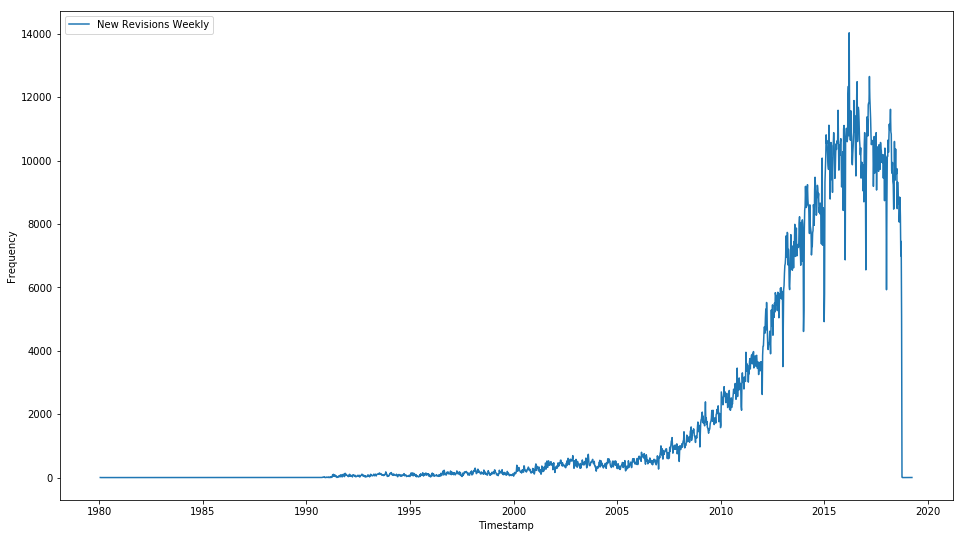

In [12]:
plt.plot(revPerWeekCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [33]:
revPerWeekShort = rev_df[(rev_df['date'] >= '2005-07-07') & (rev_df['date'] < '2018-10-01')]

In [34]:
revPerWeekShortCount = pd.DataFrame()
revPerWeekShortCount['count'] = revPerWeekShort['date'].value_counts().resample('w').apply('count')
revPerWeekShortCount.head()

,count
2005-07-10,204
2005-07-17,529
2005-07-24,415
2005-07-31,325
2005-08-07,367


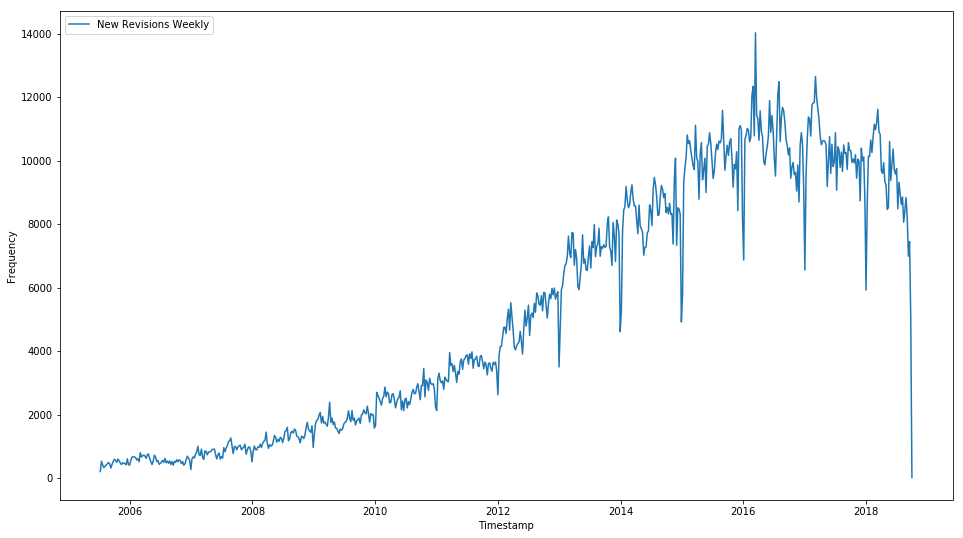

In [35]:
plt.plot(revPerWeekShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [36]:
revPerDayShortCount = pd.DataFrame()
revPerDayShortCount['count'] = revPerWeekShort['date'].value_counts().resample('d').apply('count')
revPerDayShortCount.head()

,count
2005-07-07,73
2005-07-08,70
2005-07-09,22
2005-07-10,39
2005-07-11,42


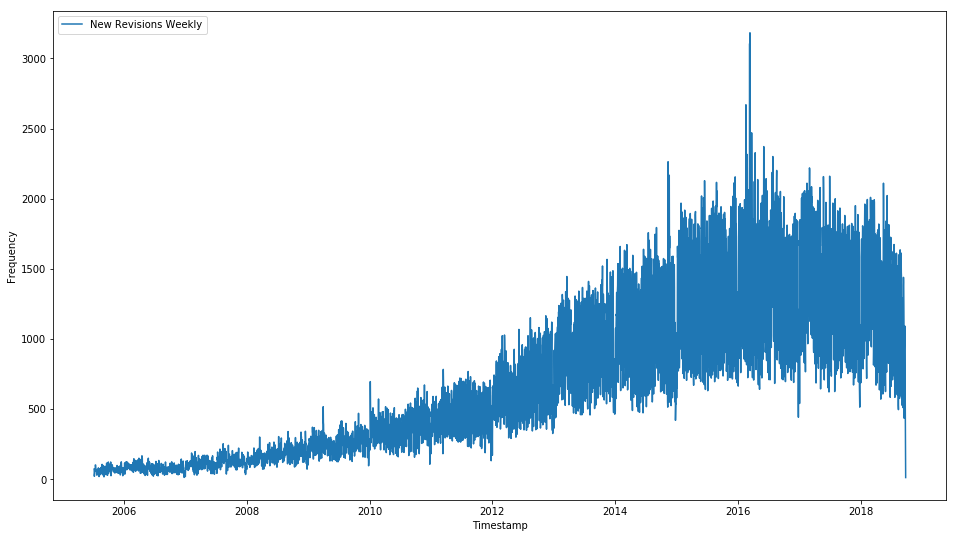

In [37]:
plt.plot(revPerDayShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [38]:
revPerMonthShortCount = pd.DataFrame()
revPerMonthShortCount['count'] = revPerWeekShort['date'].value_counts().resample('m').apply('count')
revPerMonthShortCount.head()

,count
2005-07-31,1473
2005-08-31,1885
2005-09-30,2029
2005-10-31,2337
2005-11-30,1992


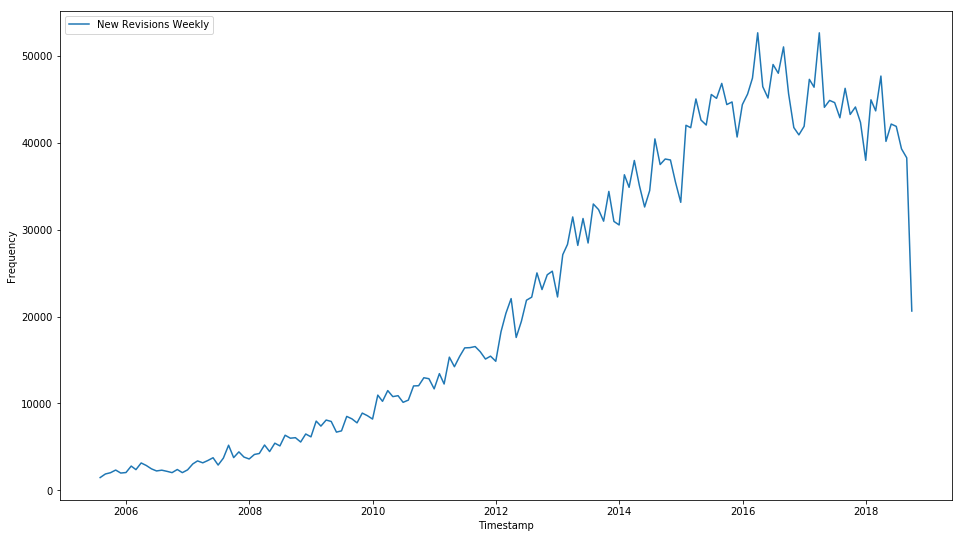

In [39]:
plt.plot(revPerMonthShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [40]:
revPerYearShortCount = pd.DataFrame()
revPerYearShortCount['count'] = revPerWeekShort['date'].value_counts().resample('y').apply('count')
revPerYearShortCount.head()

,count
2005-12-31,11768
2006-12-31,29261
2007-12-31,44246
2008-12-31,65212
2009-12-31,95124


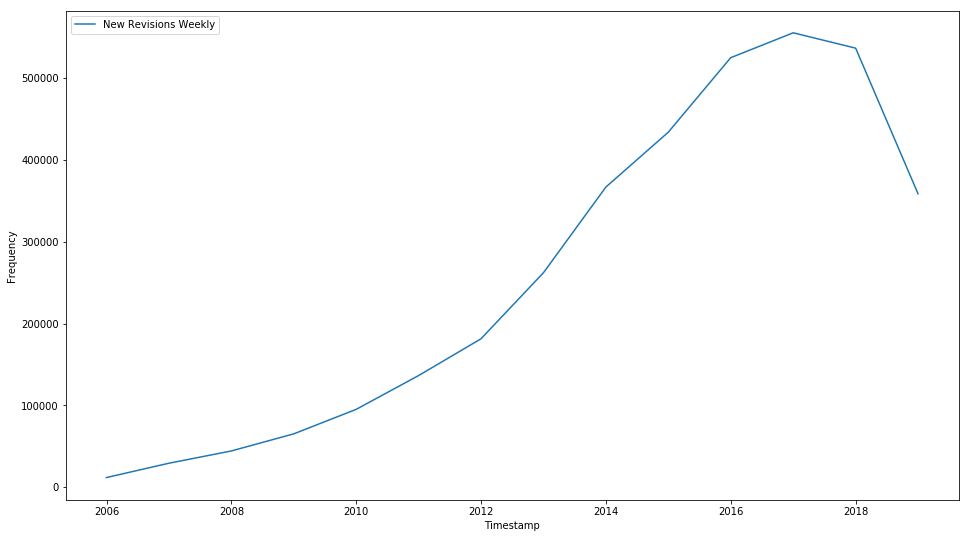

In [41]:
plt.plot(revPerYearShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

Releases Ploting

In [42]:
relShort = release_df[(release_df['date'] >= '2005-07-07') & (release_df['date'] < '2018-10-01')]

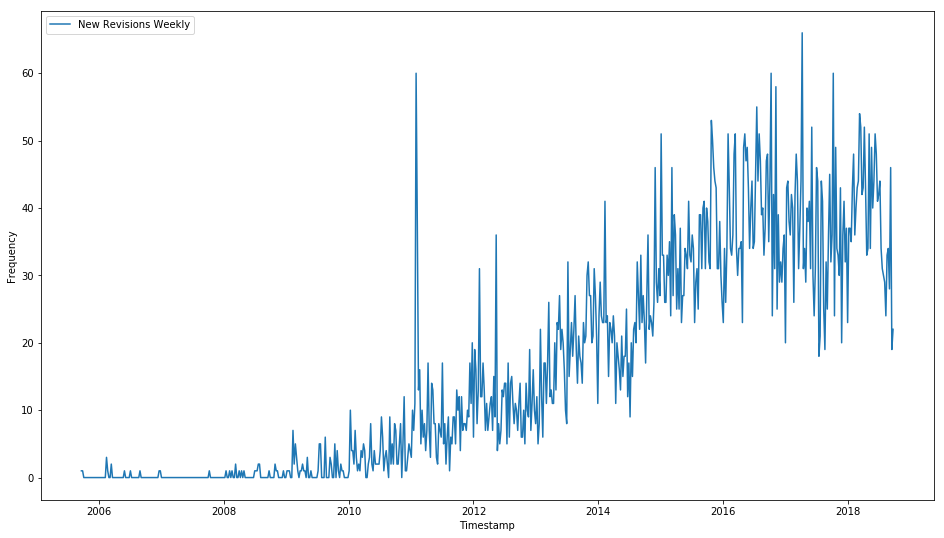

In [43]:
relPerWeekShort = pd.DataFrame()
relPerWeekShort['count'] = relShort['date'].value_counts().resample('w').apply('count')
relPerWeekShort.head()
plt.plot(relPerWeekShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

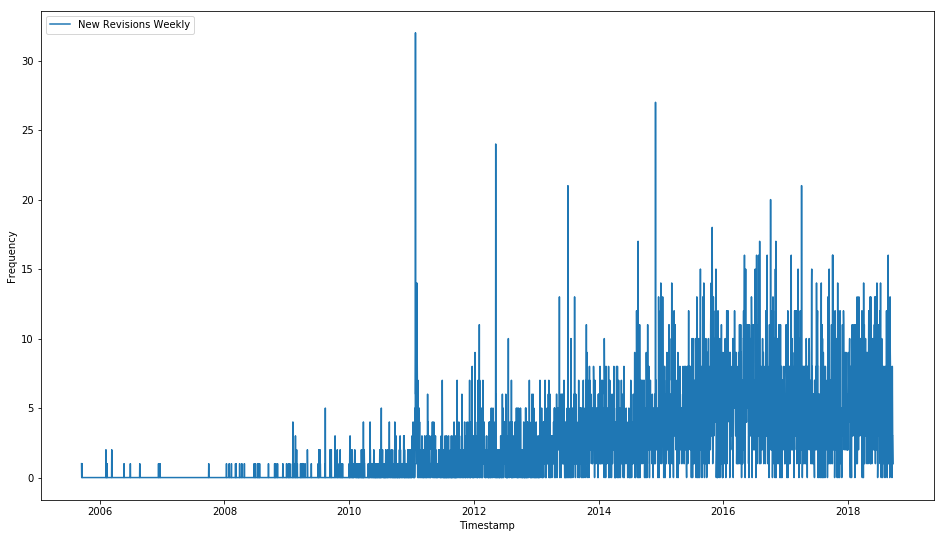

In [28]:
relPerDayShort = pd.DataFrame()
relPerDayShort['count'] = relShort['date'].value_counts().resample('d').apply('count')
relPerDayShort.head()
plt.plot(relPerDayShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

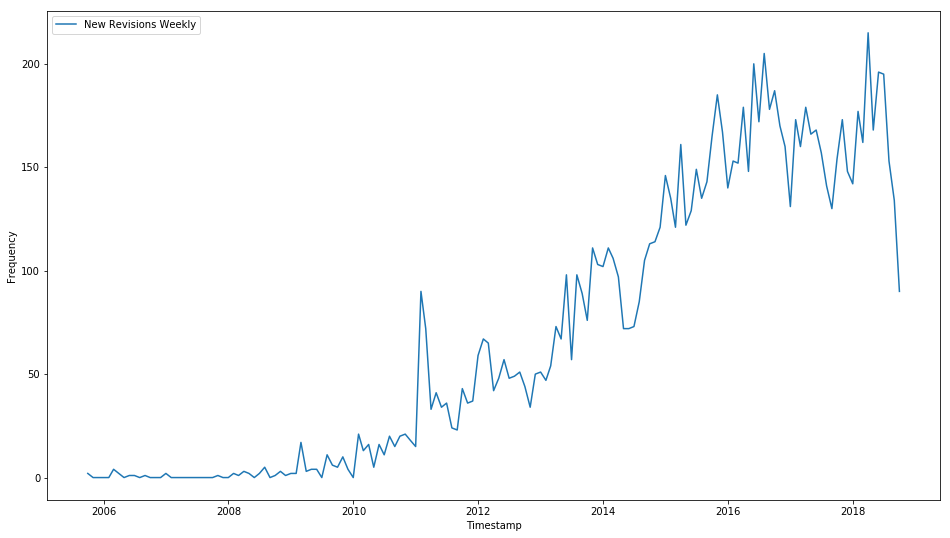

In [29]:
relPerMonthShort = pd.DataFrame()
relPerMonthShort['count'] = relShort['date'].value_counts().resample('m').apply('count')
relPerMonthShort.head()
plt.plot(relPerMonthShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

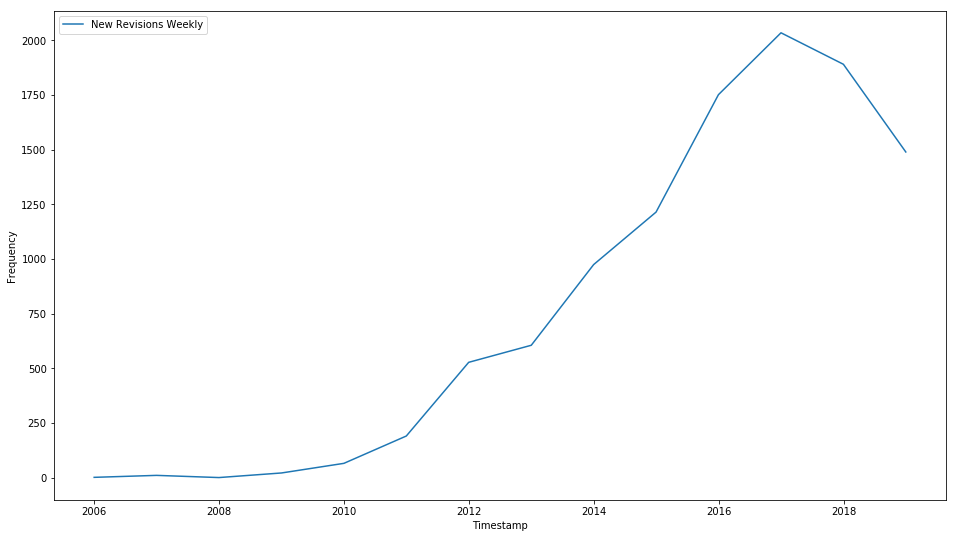

In [30]:
relPerYearShort = pd.DataFrame()
relPerYearShort['count'] = relShort['date'].value_counts().resample('y').apply('count')
relPerYearShort.head()
plt.plot(relPerYearShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

#### Obviously there are more Revisions per year by a huge factor than there are Releases

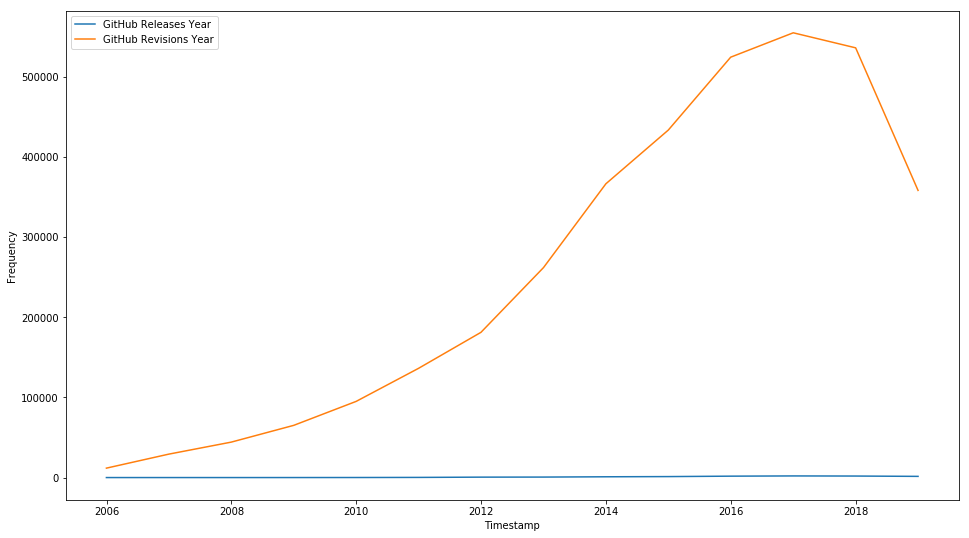

In [44]:
plt.plot(relPerYearShort, label='GitHub Releases Year')
plt.plot(revPerYearShortCount, label='GitHub Revisions Year')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

#### Plotting Both Releases Per Year and Revisions Per Year together with different scaled y-axis

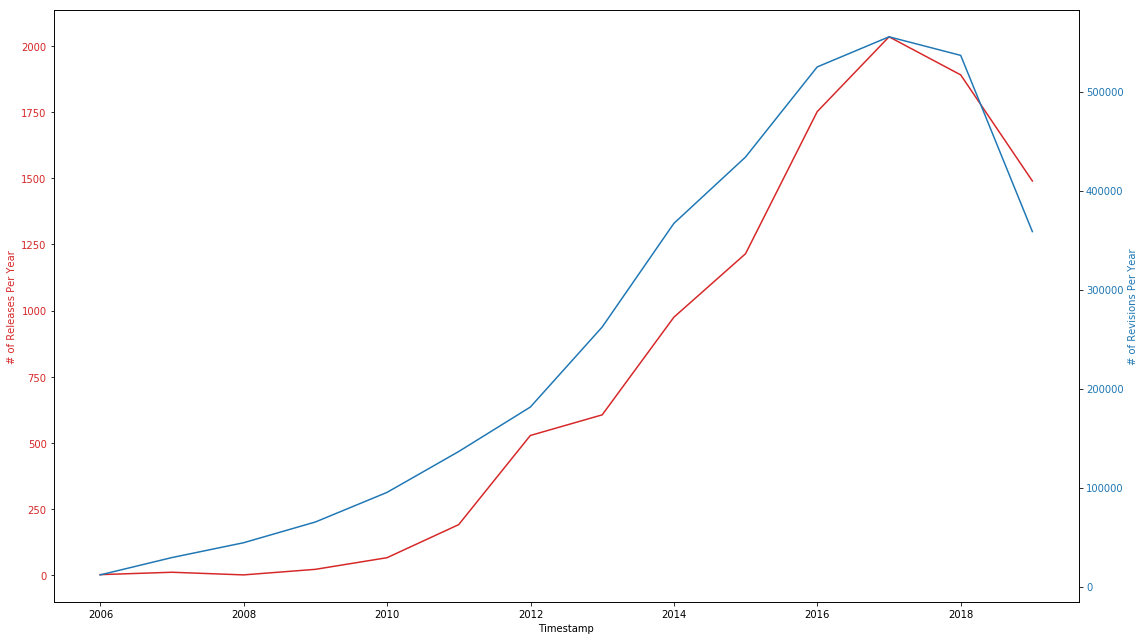

In [45]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Per Year', color=color)
ax1.plot(relPerYearShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Year', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerYearShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Trimming

In [77]:
def cleanByYearRelease(df):
    df = df[(df['date'] >= '2017-01-07') & (df['date'] < '2018-09-23')]
    
    return df

In [78]:
TrimmedReleases = cleanByYearRelease(release_df)

In [150]:
TrimmedReleases_by_week = pd.DataFrame()
TrimmedReleases_by_week['count'] = TrimmedReleases['date'].value_counts().resample('w').apply('count')

### Releases Plot

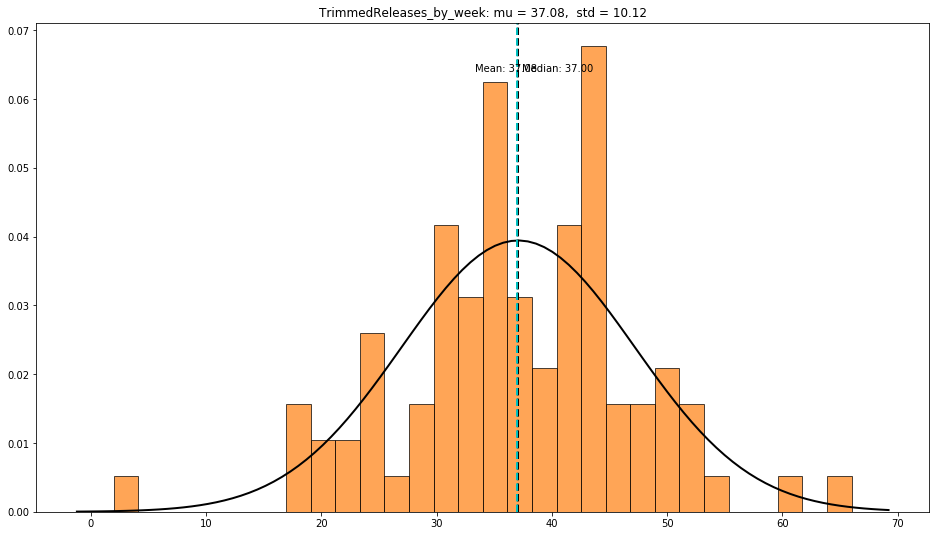

In [270]:
mu,std = norm.fit(TrimmedReleases_by_week['count'])

plt.hist(TrimmedReleases_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedReleases_by_week: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedReleases_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedReleases_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedReleases_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedReleases_by_week['count'].median()))

plt.show()

In [268]:
rev_df
TrimmedRevisions = cleanByYearRelease(rev_df)
TrimmedRevisions_by_week = pd.DataFrame()
TrimmedRevisions_by_week['count'] = TrimmedRevisions['date'].value_counts().resample('w').apply('count')

### Revisions Plot

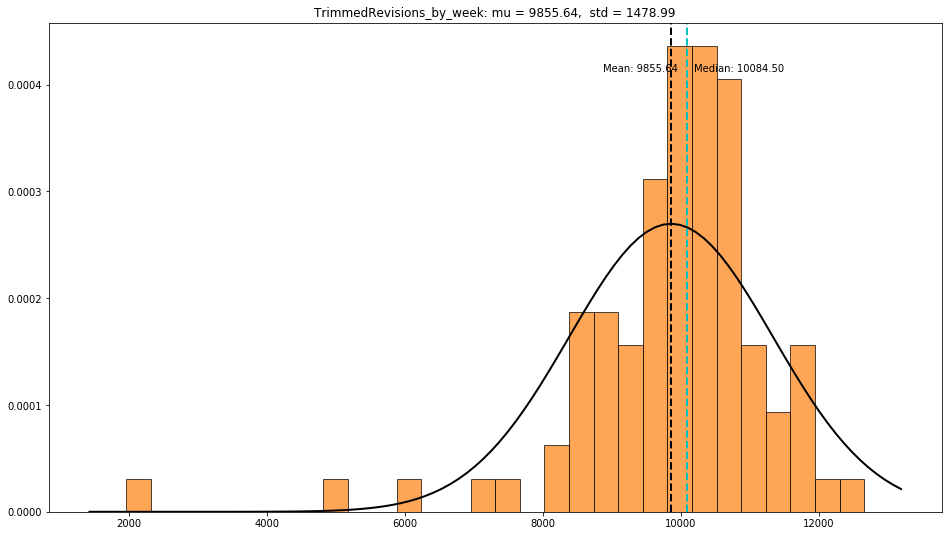

In [271]:
mu,std = norm.fit(TrimmedRevisions_by_week['count'])

plt.hist(TrimmedRevisions_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "TrimmedRevisions_by_week: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedRevisions_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedRevisions_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedRevisions_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedRevisions_by_week['count'].median()))

plt.show()

# Removing Outliers Start

### Removing Outliers from Revisions

In [83]:
Q1 = TrimmedRevisions_by_week.quantile(0.25)
Q3 = TrimmedRevisions_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    1283.75
dtype: float64


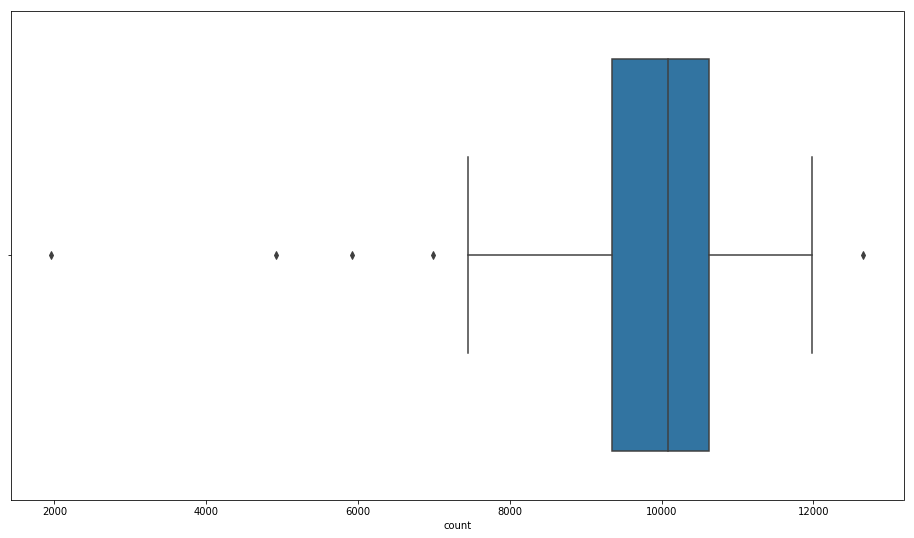

In [84]:
import seaborn as sns
sns.boxplot(x=TrimmedRevisions_by_week['count'])

In [85]:
boston_df_out = TrimmedRevisions_by_week[~((TrimmedRevisions_by_week < (Q1 - 1.5 * IQR)) |(TrimmedRevisions_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(85, 1)

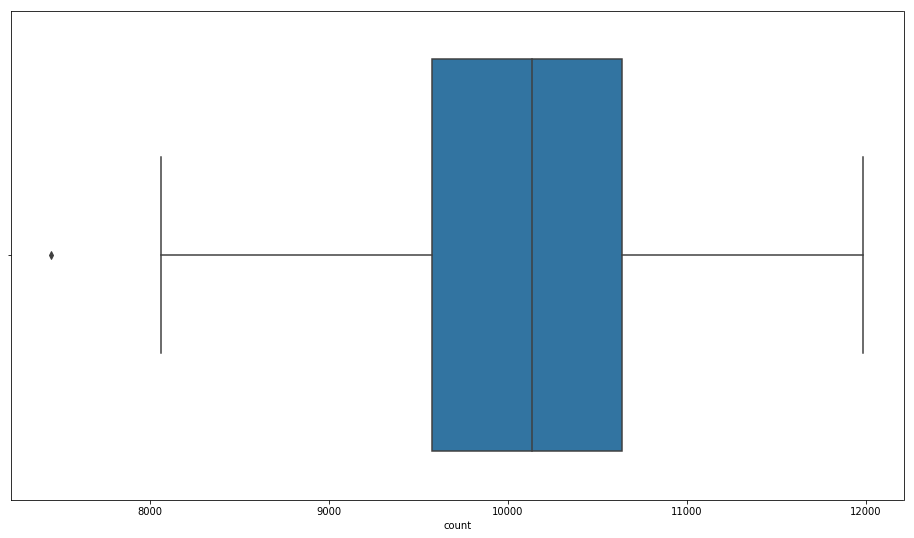

In [86]:
sns.boxplot(x=boston_df_out['count'])

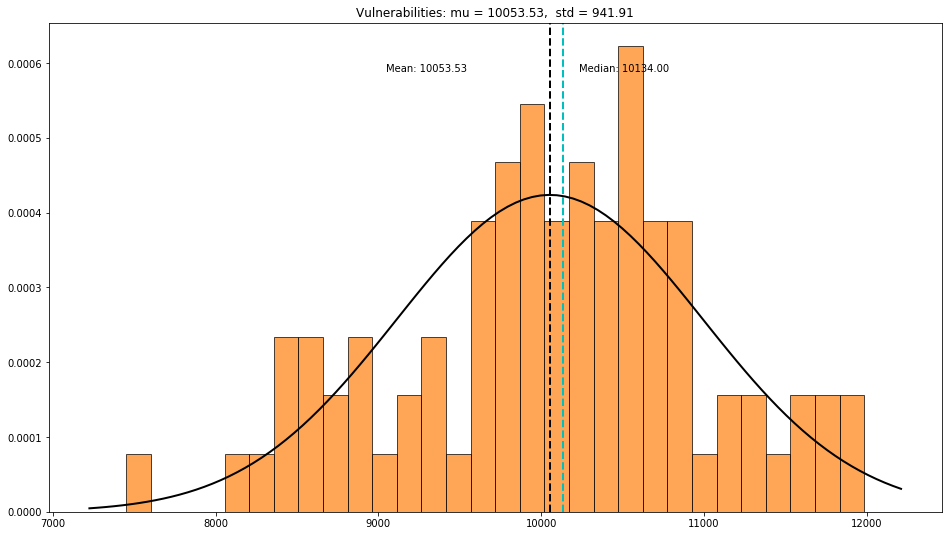

In [87]:
mu,std = norm.fit(boston_df_out['count'])

plt.hist(boston_df_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(boston_df_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(boston_df_out['count'].mean()))

#Calc Median and Display
plt.axvline(boston_df_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(boston_df_out['count'].median()))

plt.show()

### Removing Outliers from Releases

In [88]:
Q1 = TrimmedReleases_by_week.quantile(0.25)
Q3 = TrimmedReleases_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    13.0
dtype: float64


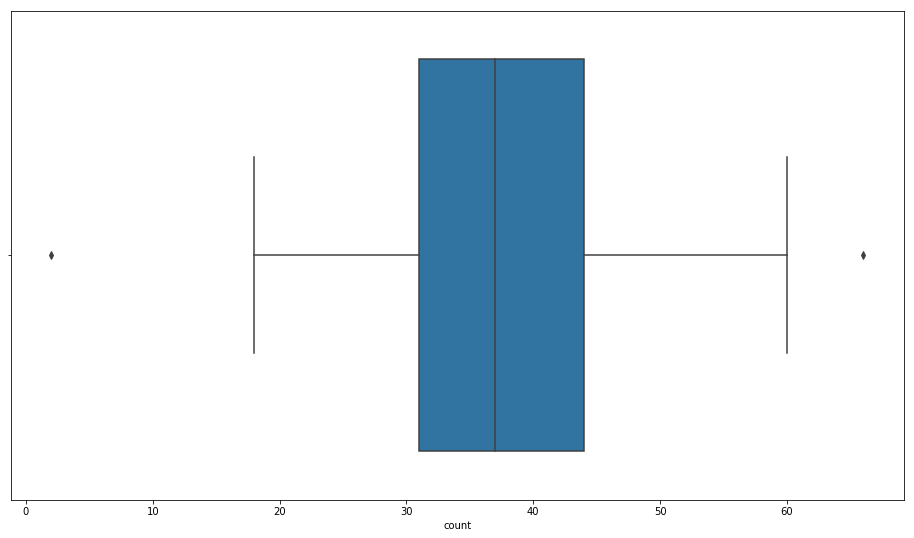

In [89]:
sns.boxplot(x=TrimmedReleases_by_week['count'])

In [90]:
boston_df_out = TrimmedReleases_by_week[~((TrimmedReleases_by_week < (Q1 - 1.5 * IQR)) |(TrimmedReleases_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(88, 1)

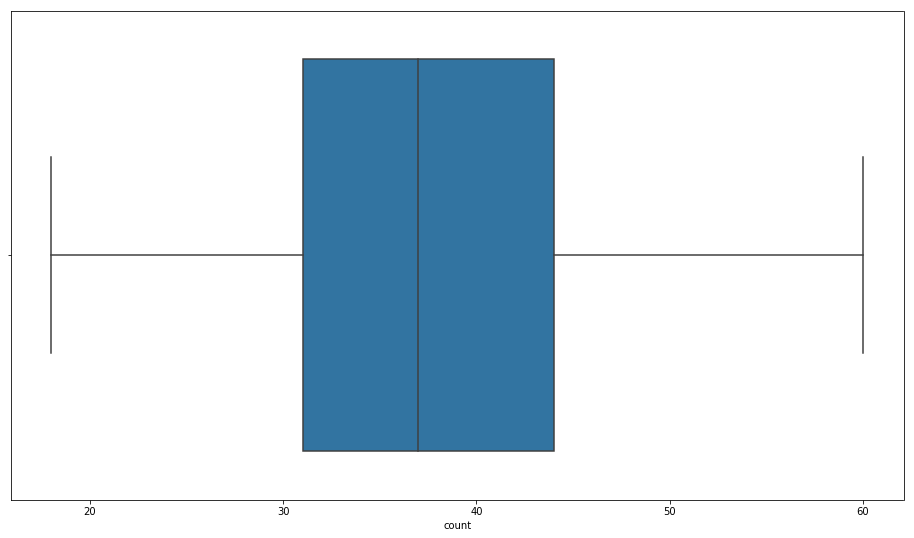

In [91]:
sns.boxplot(x=boston_df_out['count'])

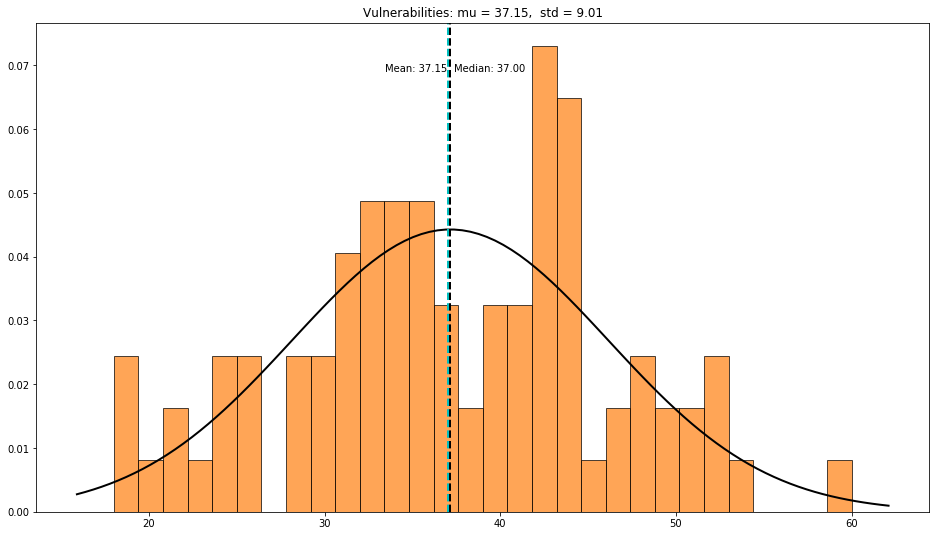

In [92]:
mu,std = norm.fit(boston_df_out['count'])

plt.hist(boston_df_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(boston_df_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(boston_df_out['count'].mean()))

#Calc Median and Display
plt.axvline(boston_df_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(boston_df_out['count'].median()))

plt.show()

# Removing Outliers End

### Run some hypothesis testing to statisticly determine that if there is an increase in revisions we should also expect an increase in releases...

- Some sort of Linear Regression TBD...

In [151]:
TrimmedRevisions_by_week.shape

(90, 1)

In [152]:
TrimmedReleases_by_week.shape

(90, 1)

In [117]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [118]:
X = TrimmedRevisions_by_week['count'].values.reshape(-1,1)
y = TrimmedReleases_by_week['count'].values.reshape(-1,1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[6.7192197]
[[0.00300239]]


In [123]:
y_pred = regressor.predict(X_test)

In [124]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,38,40.889430
1,66,38.256334
2,37,37.187482
3,49,36.532961
4,43,36.565987
5,41,37.562781
6,43,36.740126
7,33,35.088811
8,44,32.194506
9,22,21.508997


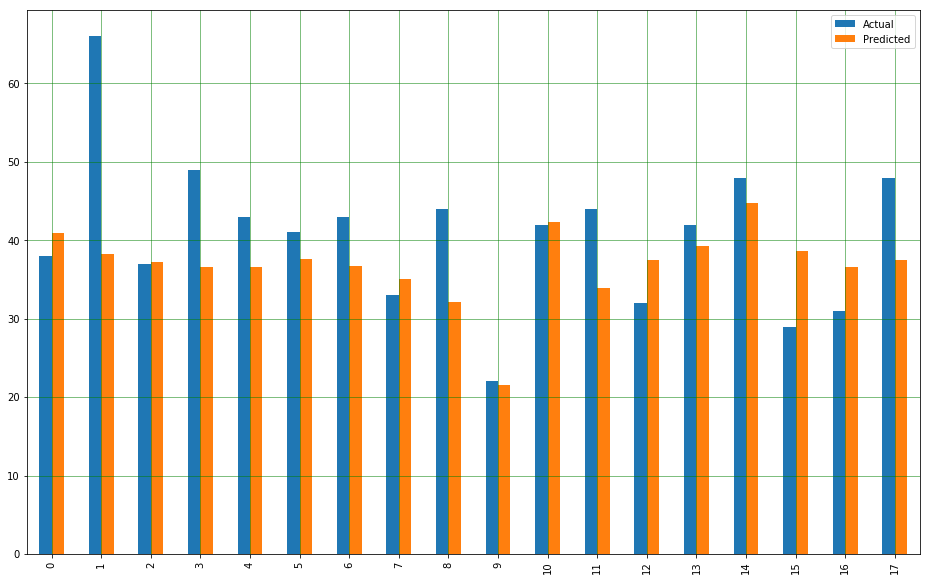

In [125]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

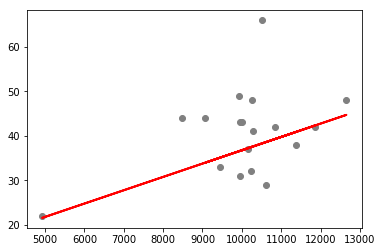

In [126]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [127]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.735699090965719
Mean Squared Error: 86.19081294936963
Root Mean Squared Error: 9.283900739956758


# Above is not enough

In [130]:
TrimmedRevisions_by_week.reset_index(level=0, inplace=True)
TrimmedReleases_by_week.reset_index(level=0, inplace=True)

In [131]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [132]:
TrimmedRevisions_by_week.shape

(90, 2)

In [133]:
TrimmedReleases_by_week.shape

(90, 2)

In [134]:
TrimmedRevisions_by_week.head()

,index,count
0,2017-01-08,1959
1,2017-01-15,10668
2,2017-01-22,11381
3,2017-01-29,11305
4,2017-02-05,10778


In [137]:
X = TrimmedRevisions_by_week[['index']].values

In [138]:
y = TrimmedRevisions_by_week[['count']].values

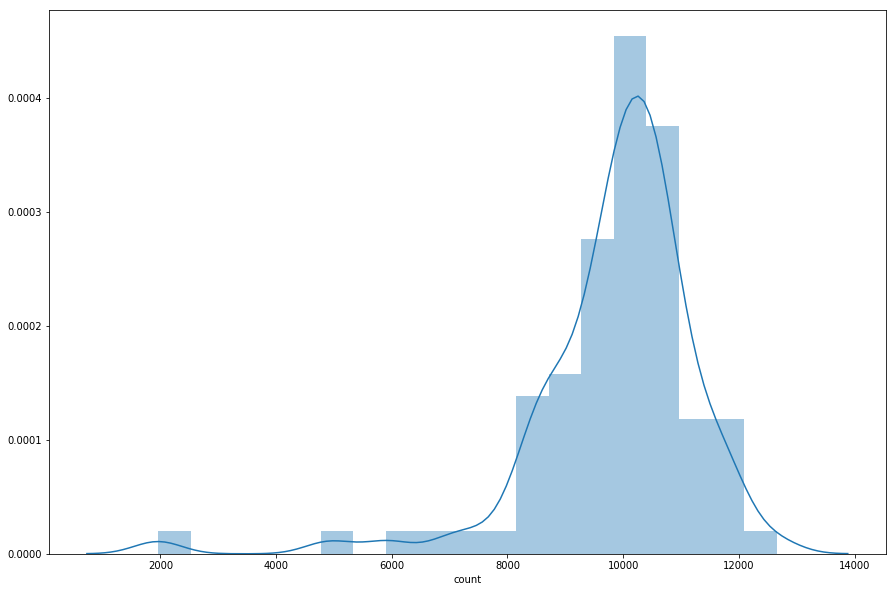

In [140]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(TrimmedRevisions_by_week['count'])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
y_pred = regressor.predict(X_test)

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

# Failed Below

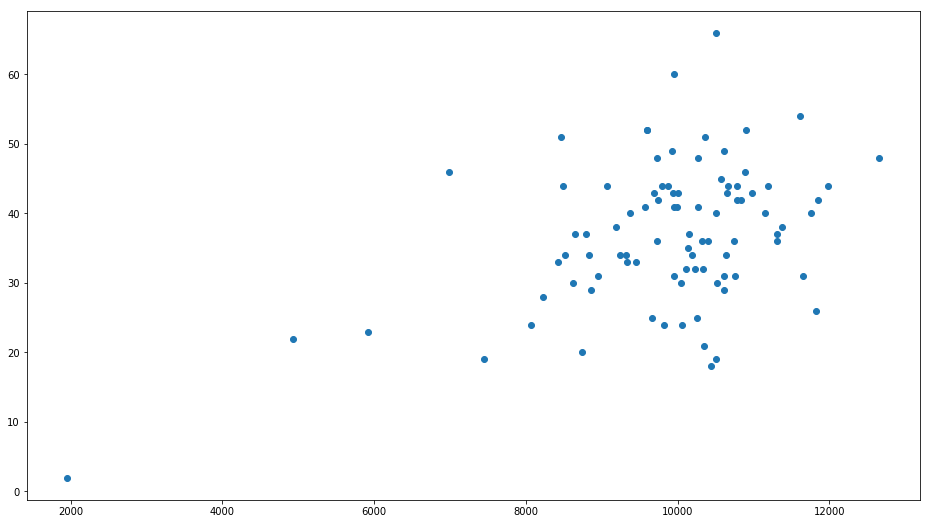

In [106]:
X = TrimmedRevisions_by_week
y = TrimmedReleases_by_week

plt.plot(X.squeeze(), y, 'o')

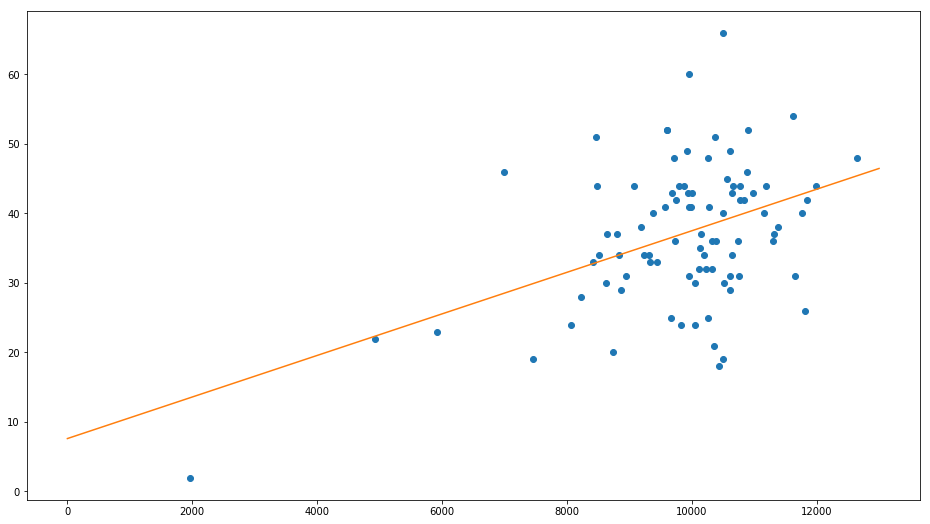

In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 13000, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

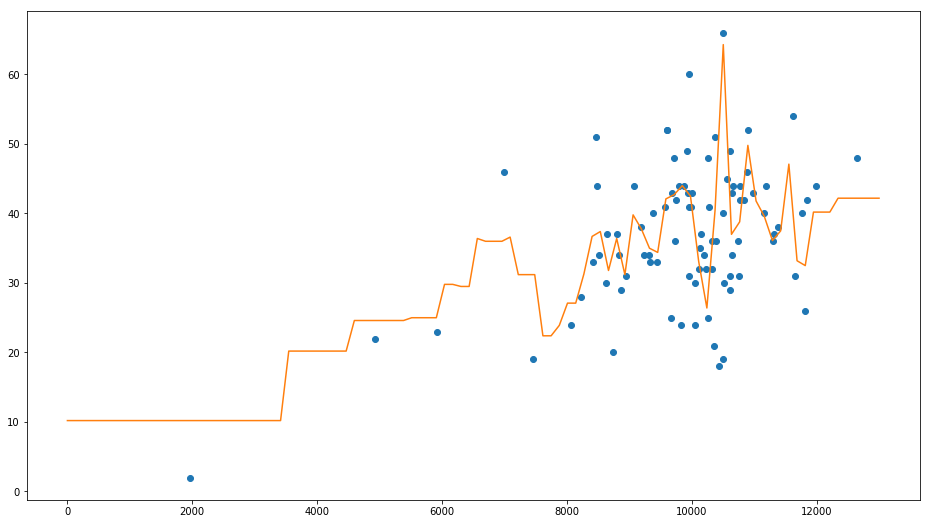

In [114]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 13000, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

# Nothing is working 8\

In [154]:
TrimmedRevisions_by_week.reset_index(level=0, inplace=True)
TrimmedReleases_by_week.reset_index(level=0, inplace=True)

In [155]:
TrimmedRevisions_by_week.head()

,index,count
0,2017-01-08,1959
1,2017-01-15,10668
2,2017-01-22,11381
3,2017-01-29,11305
4,2017-02-05,10778


In [156]:
testingDF = pd.DataFrame()

In [157]:
testingDF['RevCount'] = TrimmedRevisions_by_week['count']

In [161]:
testingDF['Date'] = TrimmedRevisions_by_week['index']
testingDF['RelCount'] = TrimmedReleases_by_week['count']

In [162]:
testingDF.head()

,RevCount,Date,RelCount
0,1959,2017-01-08,2
1,10668,2017-01-15,44
2,11381,2017-01-22,38
3,11305,2017-01-29,36
4,10778,2017-02-05,42


In [163]:
testingDF.shape

(90, 3)

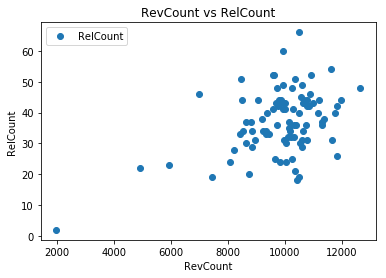

In [164]:
testingDF.plot(x='RevCount', y='RelCount', style='o')  
plt.title('RevCount vs RelCount')  
plt.xlabel('RevCount')  
plt.ylabel('RelCount')  
plt.show()

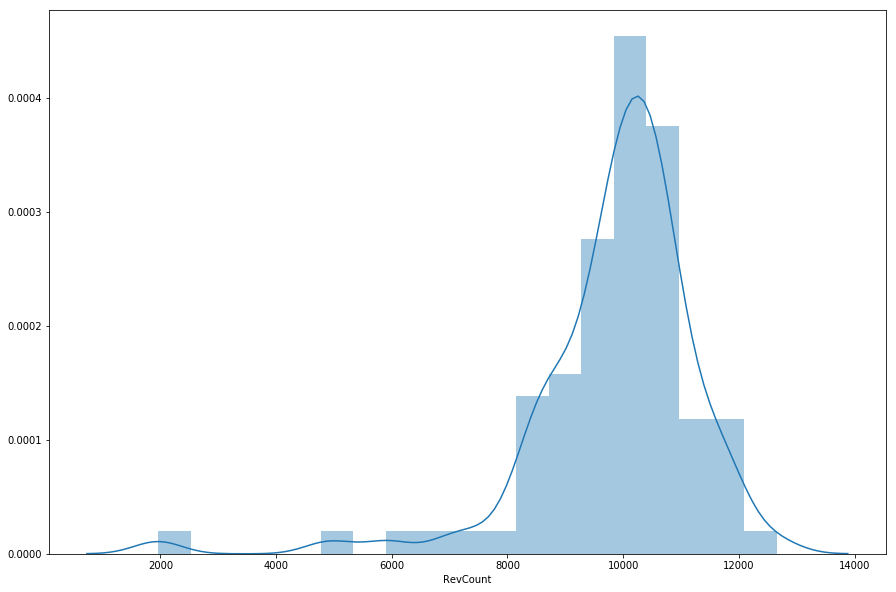

In [165]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(testingDF['RevCount'])

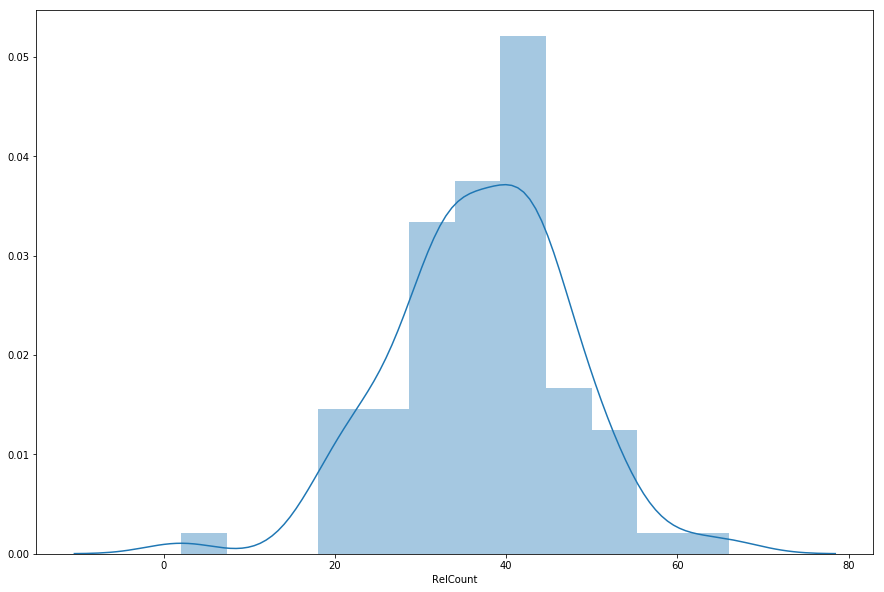

In [166]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(testingDF['RelCount'])

In [167]:
X = testingDF['RevCount'].values.reshape(-1,1)
y = testingDF['RelCount'].values.reshape(-1,1)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [169]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[6.7192197]
[[0.00300239]]


In [171]:
y_pred = regressor.predict(X_test)

In [172]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,38,40.889430
1,66,38.256334
2,37,37.187482
3,49,36.532961
4,43,36.565987
5,41,37.562781
6,43,36.740126
7,33,35.088811
8,44,32.194506
9,22,21.508997


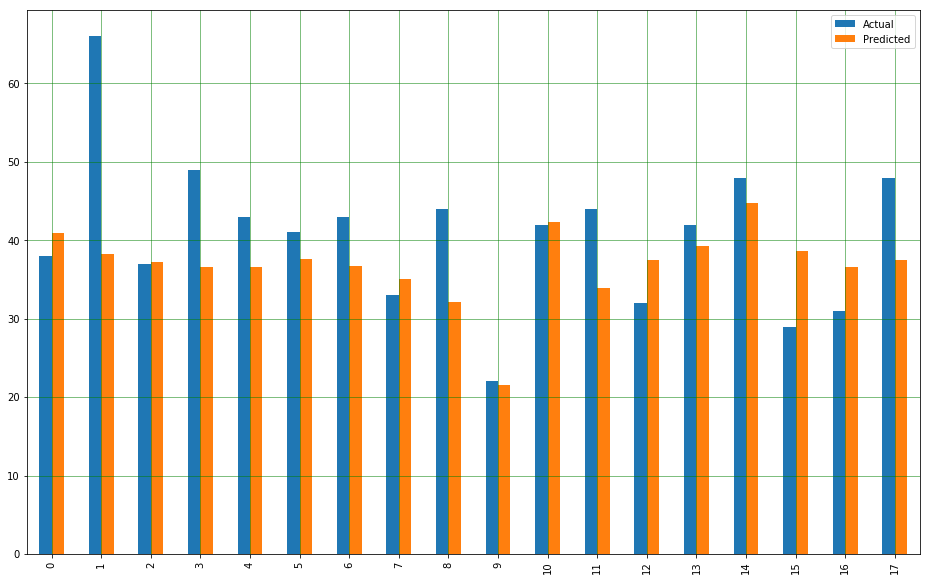

In [173]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

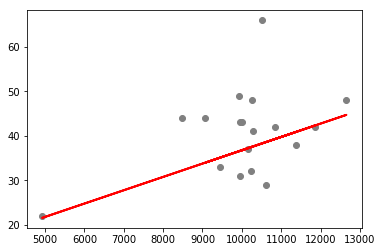

In [174]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [175]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.735699090965719
Mean Squared Error: 86.19081294936963
Root Mean Squared Error: 9.283900739956758


# New Dataframe doesn't work so lets use ANOTHER Regression?

In [181]:
testingDF.head()

,RevCount,Date,RelCount
0,1959,2017-01-08,2
1,10668,2017-01-15,44
2,11381,2017-01-22,38
3,11305,2017-01-29,36
4,10778,2017-02-05,42


In [211]:
testingDF.reset_index(level=0, inplace=True)

In [212]:
testingDF.head()

,index,RevCount,Date,RelCount
0,0,1959,2017-01-08,2
1,1,10668,2017-01-15,44
2,2,11381,2017-01-22,38
3,3,11305,2017-01-29,36
4,4,10778,2017-02-05,42


In [249]:
X = testingDF[['RevCount', 'index']].values
y = testingDF['RelCount'].values

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [251]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [252]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [253]:
y_pred = regressor.predict(X_test)

In [254]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [255]:
df1.head(25)

,Actual,Predicted
0,38,36.624381
1,66,34.712976
2,37,38.281631
3,49,36.005057
4,43,39.102449
5,41,35.933729
6,43,36.750301
7,33,34.463636
8,44,35.163487
9,22,23.293858


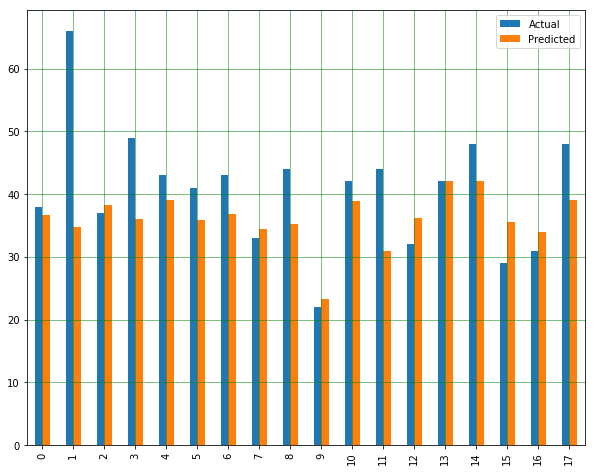

In [258]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [259]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.57418092591444
Mean Squared Error: 93.03365702118337
Root Mean Squared Error: 9.64539563839573


# Hypothesis Testing
## Null Hypothesis (H0): 
### - A week with a higher than normal amount of revisions results in the same constant amount of releases
## Hypothesis (H): 
### - A week with a higher than normal amount of revisions results in a higher than normal amount of releases

In [260]:
testingDF['RevCount'].corr(testingDF['RelCount'])

0.4369856088186449

In [272]:
testingDF['RevCount'].var()

2211985.8721597996

In [273]:
testingDF['RelCount'].var()

103.53320848938829